<a href="https://colab.research.google.com/github/muskanthakur0221/The-Sparks-Foundation/blob/main/Muskan_Thakur(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK-2**

# **Muskan Thakur**

**Prediction using Unsupervised ML**

**Objective: Predicting the optimum number of clusters and representing it visually.**

### **Importing libraries**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

### **Importing dataset**

In [10]:
from google.colab import files
  
  
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [12]:
import io
df= pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **EDA to gain insights from data**

In [13]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **Pairplot insights**
**-Petal-length and petal-width: Linear relationship**

**-Iris setosa forms a separate cluster and other two, Iris-versicolor and 
Iris-virginica are inseparable clusters.**

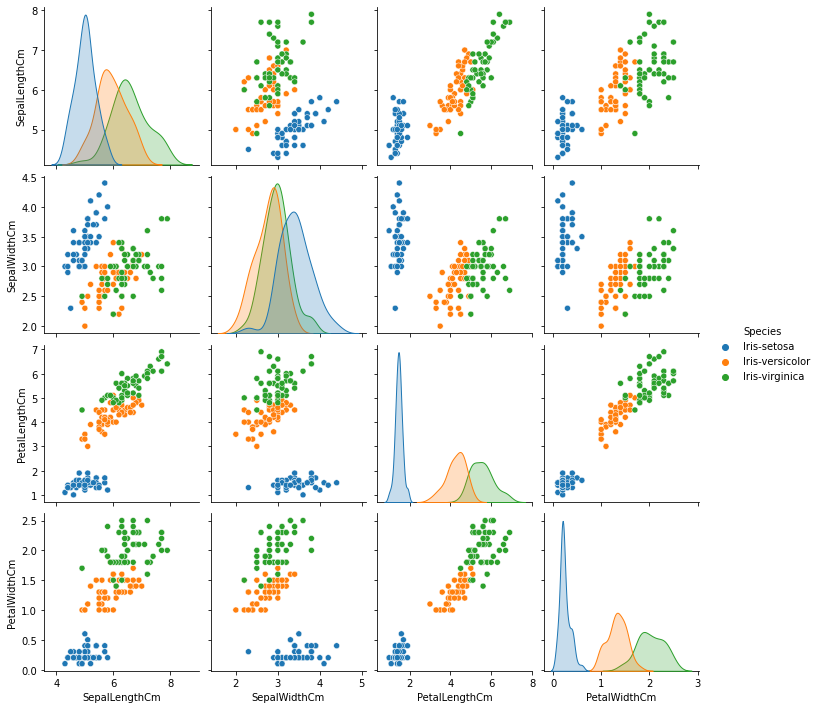

In [22]:
sns.pairplot(df.iloc[:,1:],hue="Species")

### **Visualisation**

In [26]:
x=iris_data.data 
y=iris_data.target

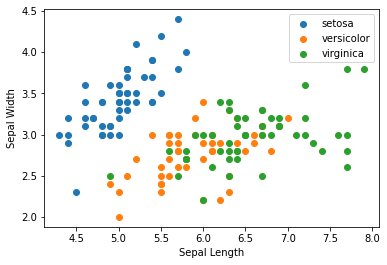

In [27]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], label = 'setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], label = 'versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], label = 'virginica')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

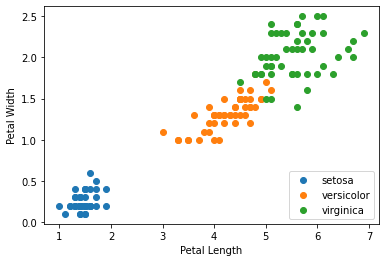

In [28]:
plt.scatter(x[y == 0, 2], x[y == 0, 3], label = 'setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], label = 'versicolor')
plt.scatter(x[y == 2, 2], x[y == 2, 3], label = 'virginica')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**Interpretation:
Petal length and petal width are the better predictors since setosa is seperable in the latter case.**

### **Determining K and optimal number of clusters for K-Means**

**Plotting graph(Elbow method)**

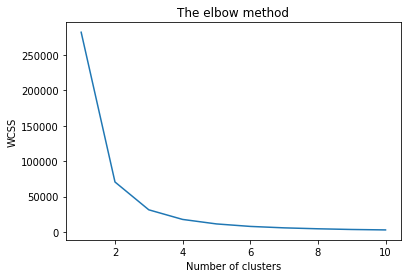

In [29]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

**Therefore, the optimum number of clusters is 3.**

### **K-Means Classifier**

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### **Visualizing the clusters of sepal length and width**

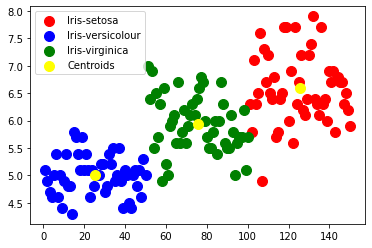

In [31]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()